In [129]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [131]:
np.random.seed(20)
data =np.concatenate([np.random.normal(0,1,950),np.random.normal(4,1,50)])
data.shape

(1000,)

In [132]:
data=data.reshape(-1,1)

In [133]:
data.shape

(1000, 1)

In [134]:
x_vals = np.linspace(min(data),max(data),1000).reshape(-1,1)

In [135]:
x_vals.shape

(1000, 1)

In [136]:
def k(xi,x,h):
    v=((xi-x)/h)
    exponent = (-1/2)*(v**2)
    e= np.exp(exponent)
    c=  e*(1/np.sqrt(2*np.pi))
    return c

In [137]:
def fun(x_vals,data,h):
    f=[]
    for x in x_vals:
        s=0
        for xi in data:
            s=s+k(xi,x,h)
        s=s/(h*len(data))
        f.append(s)
    return f

In [138]:
densities = fun(x_vals,data,1.0)

In [139]:
len(densities)

1000

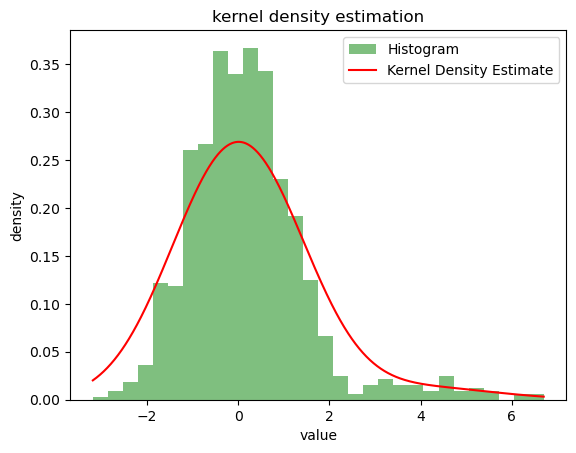

In [147]:
#plot the original data and the KDE estimate
plt.hist(data, bins=30 ,density=True,alpha=0.5,color='green',label='Histogram')
plt.plot(x_vals,densities,color='red',label='Kernel Density Estimate')
plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [148]:
densities_1 = fun(x_vals,data[:950],1.0)

In [149]:
densities_2 = fun(x_vals,data[950:],1.0)

In [177]:
density_sum=[]
for i in range(len(densities_1)):
    density_sum.append(densities_1[i]+densities_2[i])
density_sum=np.array(density_sum)

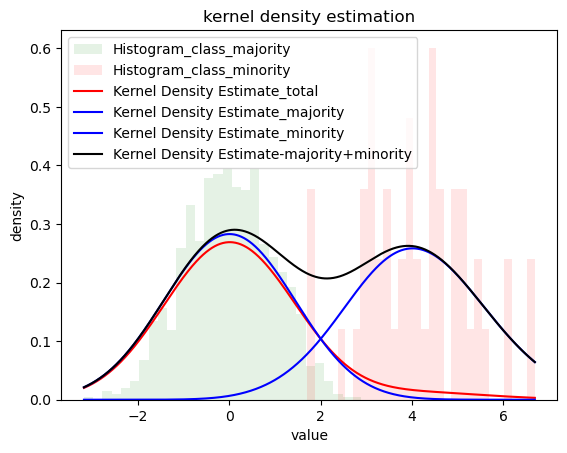

In [191]:
#plot the original data and the KDE estimate
plt.hist(data[:950], bins=30 ,density=True,alpha=0.1,color='green',label='Histogram_class_majority')
plt.hist(data[950:], bins=30 ,density=True,alpha=0.1,color='red',label='Histogram_class_minority')
plt.plot(x_vals,densities,color='red',label='Kernel Density Estimate_total')
plt.plot(x_vals,densities_1,color='blue',label='Kernel Density Estimate_majority')
plt.plot(x_vals,densities_2,color='blue',label='Kernel Density Estimate_minority')
plt.plot(x_vals,density_sum,color='black',label='Kernel Density Estimate-majority+minority')


plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()